<a href="https://colab.research.google.com/github/maashon/PinterestSeleniumTest/blob/master/DM_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# mounting the drive cloud for loading the dataset and saving the resaults
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#changing the file format for csv compatibility
f=open('/content/drive/MyDrive/colab/data mining/practice/project/project_data.csv',"r")
fo=open('/content/drive/MyDrive/colab/data mining/practice/project/data.csv',"w")
c=1
lines=f.readlines()
for line in lines:
  l=""
  s=line.split(";")
  for i in range(len(s)):
    l=l+s[i]+','
  l=l[:-1]+"\n"
  fo.write(l)
fo.close()
f.close()

In [2]:
#loading the dataset from drive
import pandas as pd
import numpy as np
dataset = pd.read_csv('/content/drive/MyDrive/colab/data mining/practice/project/data.csv')
print(dataset.iloc[:10,:])
print("The data has {} records with {} null values".format(len(dataset),dataset.isnull().sum().sum()))


   X01  X02  X03  X04   X05  X06  X07  ...   X15 X16   X17  X18   X19   X20  Y
0  A11    6  A34  A43  1169  A65  A75  ...  A152   2  A173    1  A192  A201  1
1  A12   48  A32  A43  5951  A61  A73  ...  A152   1  A173    1  A191  A201  2
2  A14   12  A34  A46  2096  A61  A74  ...  A152   1  A172    2  A191  A201  1
3  A11   42  A32  A42  7882  A61  A74  ...  A153   1  A173    2  A191  A201  1
4  A11   24  A33  A40  4870  A61  A73  ...  A153   2  A173    2  A191  A201  2
5  A14   36  A32  A46  9055  A65  A73  ...  A153   1  A172    2  A192  A201  1
6  A14   24  A32  A42  2835  A63  A75  ...  A152   1  A173    1  A191  A201  1
7  A12   36  A32  A41  6948  A61  A73  ...  A151   1  A174    1  A192  A201  1
8  A14   12  A32  A43  3059  A64  A74  ...  A152   1  A172    1  A191  A201  1
9  A12   30  A34  A40  5234  A61  A71  ...  A152   2  A174    1  A191  A201  2

[10 rows x 21 columns]
The data has 1000 records with 0 null values


In [3]:
# discretizing the data from string type
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
dataset.iloc[:, 0]=labelencoder.fit_transform(dataset.iloc[:, 0])
dataset.iloc[:, 2]=labelencoder.fit_transform(dataset.iloc[:, 2])
dataset.iloc[:, 3]=labelencoder.fit_transform(dataset.iloc[:, 3])
dataset.iloc[:, 5]=labelencoder.fit_transform(dataset.iloc[:, 5])
dataset.iloc[:, 6]=labelencoder.fit_transform(dataset.iloc[:, 6])
dataset.iloc[:, 8]=labelencoder.fit_transform(dataset.iloc[:, 8])
dataset.iloc[:, 9]=labelencoder.fit_transform(dataset.iloc[:, 9])
dataset.iloc[:, 11]=labelencoder.fit_transform(dataset.iloc[:, 11])
dataset.iloc[:, 13]=labelencoder.fit_transform(dataset.iloc[:, 13])
dataset.iloc[:, 14]=labelencoder.fit_transform(dataset.iloc[:, 14])
dataset.iloc[:, 16]=labelencoder.fit_transform(dataset.iloc[:, 16])
dataset.iloc[:, 18]=labelencoder.fit_transform(dataset.iloc[:, 18])
dataset.iloc[:, 19]=labelencoder.fit_transform(dataset.iloc[:, 19])
X=dataset.iloc[:,:20]
y=dataset.iloc[:, -1].values
y = labelencoder.fit_transform(y)
trainRatio=0.90



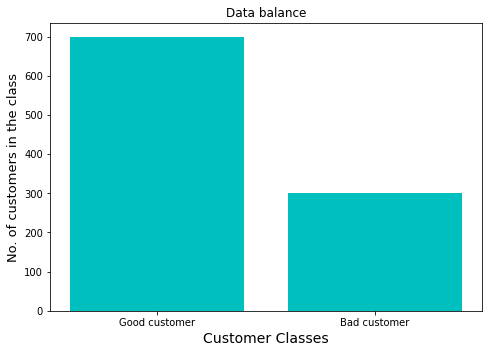

In [4]:
# measuring the dataset balance
class0=0
class1=1
for i in range(len(y)):
  if y[i]==0:
    class0=class0+1;
  else:
    class1=class1+1
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_axes([1, 1, 1, 1])

label = ['Good customer', 'Bad customer']
count = [class0, class1]

ax.bar(label, count, color = 'c')
plt.xlabel("Customer Classes",fontSize=14)
plt.ylabel("No. of customers in the class",fontSize=13)
plt.title("Data balance")
plt.show()


In [5]:
# introducing the new model Quality criterion
def inverseQualityMeasure(confusionMatrix):
  qm=confusionMatrix[0][1]/(confusionMatrix[1][1]+confusionMatrix[0][1])
  return int(qm*100)

In [7]:
# model 1) applying averaging KNN technique
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
qmList=[]
badF1List=[]
avgF1List=[]

numOfIteratoins=100;
for i in range(numOfIteratoins):
  X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = trainRatio,shuffle=True,random_state=i)
  knn = KNeighborsClassifier(n_neighbors =20)
  knn.fit(X_train, y_train)
  y_pred = knn.predict(X_test)
  cm=confusion_matrix(y_test, y_pred)
  qmList.append(inverseQualityMeasure(cm))
  cr=classification_report(y_test, y_pred)
  badF1Score=float(cr.split()[12])
  badF1List.append(badF1Score*100)
  avgF1Score=(float(cr.split()[7])+float(cr.split()[12]))/2
  avgF1List.append(avgF1Score*100)
badF1avg=sum(badF1List)/len(badF1List)
avgF1avg=sum(avgF1List)/len(avgF1List)
QMavg=sum(qmList)/len(qmList)

print("The average quality of the model is : ",QMavg,"and the average bad F1 score is : ",badF1avg," and average F1 score is :",avgF1avg)
modleResults={"KNN":{"Quality":QMavg,"badF1Score":badF1avg,"averageF1Score":avgF1avg}}

#print(modleResults.get("KNN")["badF1Score"])



The average quality of the model is :  43.21 and the average bad F1 score is :  13.81  and average F1 score is : 47.695


In [14]:
# model 2) applying averaging Logistic Regression 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report


qmList=[]
badF1List=[]
avgF1List=[]

numOfIteratoins=100;
for i in range(numOfIteratoins):
  X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = trainRatio,shuffle=True,random_state=i)
  lr = LogisticRegression(max_iter = 1500,random_state=i)
  lr.fit(X_train, y_train)
  y_pred = lr.predict(X_test)
  cm=confusion_matrix(y_test, y_pred)
  qmList.append(inverseQualityMeasure(cm))
  cr=classification_report(y_test, y_pred)
  badF1Score=float(cr.split()[12])
  badF1List.append(badF1Score*100)
  avgF1Score=(float(cr.split()[7])+float(cr.split()[12]))/2
  avgF1List.append(avgF1Score*100)

badF1avg=sum(badF1List)/len(badF1List)
avgF1avg=sum(avgF1List)/len(avgF1List)
QMavg=sum(qmList)/len(qmList)

print("The average quality of the model is : ",QMavg,"and the average bad F1 score is : ",badF1avg," and average F1 score is :",avgF1avg)
modleResults.update({"LR":{"Quality":QMavg,"badF1Score":badF1avg,"averageF1Score":avgF1avg}})

#modleResults={"LR":{"Quality":QMavg,"badF1Score":badF1avg}}


The average quality of the model is :  35.82 and the average bad F1 score is :  51.65  and average F1 score is : 67.445


In [9]:
# model 3) applying averaging Guassian method 
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

qmList=[]
badF1List=[]
avgF1List=[]
numOfIteratoins=100;
for i in range(numOfIteratoins):
  X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = trainRatio,shuffle=True,random_state=i)
  gnb = GaussianNB()
  gnb.fit(X_train, y_train)
  y_pred = gnb.predict(X_test)
  cm=confusion_matrix(y_test, y_pred)
  qmList.append(inverseQualityMeasure(cm))
  cr=classification_report(y_test, y_pred)
  badF1Score=float(cr.split()[12])
  badF1List.append(badF1Score*100)
  avgF1Score=(float(cr.split()[7])+float(cr.split()[12]))/2
  avgF1List.append(avgF1Score*100)
  

badF1avg=sum(badF1List)/len(badF1List)
avgF1avg=sum(avgF1List)/len(avgF1List)
QMavg=sum(qmList)/len(qmList)

print("The average quality of the model is : ",QMavg,"and the average bad F1 score is : ",badF1avg," and average F1 score is :",avgF1avg)
modleResults.update({"GU":{"Quality":QMavg,"badF1Score":badF1avg,"averageF1Score":avgF1avg}})




The average quality of the model is :  43.0 and the average bad F1 score is :  58.33  and average F1 score is : 69.535


In [10]:
# model 4) applying averaging Random Forest method 
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

qmList=[]
badF1List=[]
numOfIteratoins=100;
for i in range(numOfIteratoins):
  X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = trainRatio,shuffle=True,random_state=i)
  rf = RandomForestClassifier(max_depth=15,criterion="entropy", random_state=0)
  rf.fit(X_train, y_train)
  y_pred = rf.predict(X_test)
  cm=confusion_matrix(y_test, y_pred)
  qmList.append(inverseQualityMeasure(cm))
  cr=classification_report(y_test, y_pred)
  badF1Score=float(cr.split()[12])
  badF1List.append(badF1Score*100)
  avgF1Score=(float(cr.split()[7])+float(cr.split()[12]))/2
  avgF1List.append(avgF1Score*100)

badF1avg=sum(badF1List)/len(badF1List)
avgF1avg=sum(avgF1List)/len(avgF1List)
QMavg=sum(qmList)/len(qmList)

print("The average quality of the model is : ",QMavg,"and the average bad F1 score is : ",badF1avg," and average F1 score is :",avgF1avg)
modleResults.update({"RFC":{"Quality":QMavg,"badF1Score":badF1avg,"averageF1Score":avgF1avg}})






The average quality of the model is :  31.88 and the average bad F1 score is :  51.62  and average F1 score is : 68.7175


In [11]:
# model 5) applying Support vector machine
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.metrics import confusion_matrix

qmList=[]
badF1List=[]
numOfIteratoins=100;
for i in range(numOfIteratoins):
  X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = trainRatio,shuffle=True,random_state=i)
  svm = make_pipeline(StandardScaler(), SVC(gamma='auto'))
  svm.fit(X_train, y_train)
  y_pred = svm.predict(X_test)
  cm=confusion_matrix(y_test, y_pred)
  qmList.append(inverseQualityMeasure(cm))
  cr=classification_report(y_test, y_pred)
  badF1Score=float(cr.split()[12])
  badF1List.append(badF1Score*100)
  avgF1Score=(float(cr.split()[7])+float(cr.split()[12]))/2
  avgF1List.append(avgF1Score*100)

badF1avg=sum(badF1List)/len(badF1List)
avgF1avg=sum(avgF1List)/len(avgF1List)
QMavg=sum(qmList)/len(qmList)
print("The average quality of the model is : ",QMavg,"and the average bad F1 score is : ",badF1avg," and average F1 score is :",avgF1avg)
modleResults.update({"SVM":{"Quality":QMavg,"badF1Score":badF1avg,"averageF1Score":avgF1avg}})





The average quality of the model is :  31.02 and the average bad F1 score is :  51.18  and average F1 score is : 68.38


In [15]:
print(modleResults)

{'KNN': {'Quality': 43.21, 'badF1Score': 13.81, 'averageF1Score': 47.695}, 'Lr': {'Quality': 35.82, 'badF1Score': 51.65, 'averageF1Score': 67.445}, 'GU': {'Quality': 43.0, 'badF1Score': 58.33, 'averageF1Score': 69.535}, 'RFC': {'Quality': 31.88, 'badF1Score': 51.62, 'averageF1Score': 68.7175}, 'SVM': {'Quality': 31.02, 'badF1Score': 51.18, 'averageF1Score': 68.38}, 'LR': {'Quality': 35.82, 'badF1Score': 51.65, 'averageF1Score': 67.445}}


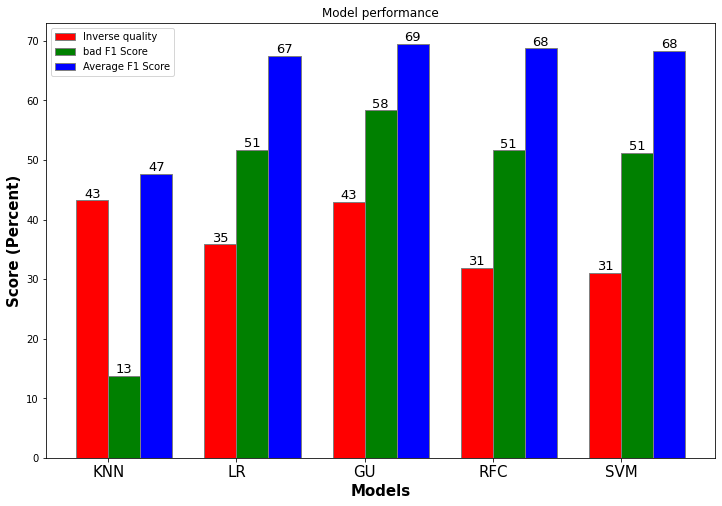

In [18]:
#plotting the model results
import numpy as np
import matplotlib.pyplot as plt

xLabel=["KNN","LR","GU","RFC","SVM"]
invQuality=[modleResults["KNN"].get("Quality"),modleResults["LR"].get("Quality"),modleResults["GU"].get("Quality"),modleResults["RFC"].get("Quality"),modleResults["SVM"].get("Quality")]
badF1Score=[modleResults["KNN"].get("badF1Score"),modleResults["LR"].get("badF1Score"),modleResults["GU"].get("badF1Score"),modleResults["RFC"].get("badF1Score"),modleResults["SVM"].get("badF1Score")]
avgF1Score=[modleResults["KNN"].get("averageF1Score"),modleResults["LR"].get("averageF1Score"),modleResults["GU"].get("averageF1Score"),modleResults["RFC"].get("averageF1Score"),modleResults["SVM"].get("averageF1Score")]
barWidth = 0.25
fig ,ax= plt.subplots(figsize =(12, 8))
br1 = np.arange(5)+0.125
br2 = [x + barWidth for x in br1]
br3=[x + barWidth for x in br2]

f1=plt.bar(br1, invQuality, color ='r', width = barWidth,
        edgecolor ='grey', label ='Inverse quality')
f2=plt.bar(br2, badF1Score, color ='g', width = barWidth,
        edgecolor ='grey', label ='bad F1 Score')
f3=plt.bar(br3, avgF1Score, color ='b', width = barWidth,
        edgecolor ='grey', label ='Average F1 Score')
plt.title("Model performance",loc="center")
plt.xlabel('Models', fontweight ='bold', fontsize = 15)
plt.ylabel('Score (Percent)', fontweight ='bold', fontsize = 15)
plt.xticks([r + barWidth for r in range(5)],
        ['KNN', 'LR', 'GU', 'RFC', 'SVM'],fontSize=15)
def autolabel(rects):
    # attach some text labels
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1*height,
                '%d' % int(height),
                ha='center', va='bottom',fontSize=13)
autolabel(f1)
autolabel(f2)
autolabel(f3)

plt.legend()
plt.show()



In [ ]:
#defining functoins for scaling and normalizing data
def scale(values,newMin,newMax):
  out=np.zeros(len(values))
  out = out.astype('float64')
  oldMax=values.max()
  oldMin=values.min()
  for i in range(len(values)):
    out[i]=(((values[i]-oldMin)/(oldMax-oldMin))*(newMax-newMin))+newMin
  return out
def Normalize(values):
  out=np.zeros(len(values))
  out = out.astype('float64')
  oldMax=values.max()
  oldMin=values.min()
  for i in range(len(values)):
    out[i]=(values[i]-oldMin)/(oldMax-oldMin)
  return out
def zScore(values):
  out=np.zeros(len(values))
  out = out.astype('float64')
  mean=values.mean()
  for i in range(len(values)):
    out[i]=(values[i]-mean)/values.std()
  return out

In [154]:
#splitting the test and train sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.85,shuffle=True,random_state=4)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
#print(X_train.iloc[1,:],"\n",y_train[1])


(850, 20) (150, 20) (850,) (150,)
